In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./xgboost-light-gbm-house-price.ipynb
./DATA/sample_submission.csv
./DATA/data_description.txt
./DATA/test.csv
./DATA/train.csv
./.vscode/settings.json


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Information about the Data Set

A brief explanation of each feature in the data set is as follows:

* SalePrice - the selling price of the property in dollars. This is the target variable trying to guess.
* MSSubClass: Construction class
* MSZoning: General zoning classification
* LotFrontage: Whether the property has a direct connection to the street
* LotArea: Parcel size
* Street: Type of road access
* Alley: Street entrance type
* LotShape: General shape of the property
* LandContour: Flatness of the property
* Utulities: Type of services available
* LotConfig: Parcel configuration
* LandSlope: The slope of the property
* Neighborhood: Physical location within Ames city limits
* Condition1: Close to main road or railway
* Condition2: Proximity to main road or railway (if there is a second place)
* BldgType: Residential type
* HouseStyle: Housing style
* OverallQual: Overall material and finish quality
* OverallCond: General situation assessment
* YearBuilt: Original production date
* YearRemodAdd: Refactor date
* RoofStyle: Roof type
* RoofMatl: Roof material
* Exterior1st: Exterior coating in the house
* Exterior2nd: Exterior coating in the house (if there is more than one material)
* MasVnrType: Wall covering type
* MasVnrArea: Square footed wall covering area
* ExterQual: Outside material quality
* ExterCond: Current state of the material outside
* Foundation: Foundation type
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walk or garden floor basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 square meter of finished area
* BsmtFinType2: Quality of the second finished space (if any)
* BsmtFinSF2: Type 2 square meter of finished area
* BsmtUnfSF: Square meter of unfinished area of the basement
* TotalBsmtSF: Total square meter of basement area
* Heating: Heating type
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical : Electrical system
* 1stFlrSF: First Floor square meter area
* 2ndFlrSF: Second floor square meter area
* LowQualFinSF: Low quality finished areas (all floors)
* GrLivArea: Above (floor) seating area square meter
* BsmtFullBath: Full baths in the basement
* BsmtHalfBath: Half baths in the basement
* FullBath: Full bathrooms on upper floors
* HalfBath: Half baths on upper floors
* BedroomAbvGr: Number of bedrooms above basement level
* KitchenAbvGr: Number of kitchens above basement level
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms on upper floors (no bathroom)
* Functional: Home functionality assessment
* Fireplaces: Fireplaces
* FireplaceQu: Fireplace quality
* Garage Type: Garage place
* GarageYrBlt: Year of construction of the garage
* GarageFinish: The interior of the garage
* GarageCars: Vehicle capacity
* GarageArea: The area of the garage
* GarageQual: Garage quality
* GarageCond: Garage status
* PavedDrive: The road between the garage and the road
* WoodDeckSF: Standing wooden deck area
* OpenPorchSF: Open patio area in front of the door
* EnclosedPorch: Closed patio area in front of the door
* 3SsPorch: The three-season patio area
* ScreenPorch: Patio cover area
* PoolArea: Square meter area of the pool
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Features not available in other categories
* MiscVal: The value of various properties
* MoSold: Month of sale
* YrSold: Year of sale
* SaleType: Sale Type
* SaleCondition: Sales Status

# Data Read and Copy

In [3]:
test = pd.read_csv("DATA/test.csv")
train = pd.read_csv("DATA/train.csv")
sample_submission = pd.read_csv("DATA/sample_submission.csv")
test_c  = test.copy()
train_c = train.copy()

In [4]:
train_c.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [54]:
test_c.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1461          20       RH         80.0    11622   Pave   NaN      Reg   
1   1462          20       RL         81.0    14267   Pave   NaN      IR1   
2   1463          60       RL         74.0    13830   Pave   NaN      IR1   
3   1464          60       RL         78.0     9978   Pave   NaN      IR1   
4   1465         120       RL         43.0     5005   Pave   NaN      IR1   
5   1466          60       RL         75.0    10000   Pave   NaN      IR1   
6   1467          20       RL          NaN     7980   Pave   NaN      IR1   
7   1468          60       RL         63.0     8402   Pave   NaN      IR1   
8   1469          20       RL         85.0    10176   Pave   NaN      Reg   
9   1470          20       RL         70.0     8400   Pave   NaN      Reg   
10  1471         120       RH         26.0     5858   Pave   NaN      IR1   
11  1472         160       RM         21.0     1680   Pave   NaN      Reg   
12  1473         160       RM         21.0     1680   Pave   NaN      Reg   
13  1474         160       RL         24.0     2280   Pave   NaN      Reg   
14  1475         120       RL         24.0     2280   Pave   NaN      Reg   
15  1476          60       RL        102.0    12858   Pave   NaN      IR1   
16  1477          20       RL         94.0    12883   Pave   NaN      IR1   
17  1478          20       RL         90.0    11520   Pave   NaN      Reg   
18  1479          20       RL         79.0    14122   Pave   NaN      IR1   
19  1480          20       RL        110.0    14300   Pave   NaN      Reg   
20  1481          60       RL        105.0    13650   Pave   NaN      Reg   
21  1482         120       RL         41.0     7132   Pave   NaN      IR1   
22  1483          20       RL        100.0    18494   Pave   NaN      IR1   
23  1484         120       RL         43.0     3203   Pave   NaN      Reg   
24  1485          80       RL         67.0    13300   Pave   NaN      IR1   
25  1486          60       RL         63.0     8577   Pave   NaN      IR1   
26  1487          60       RL         60.0    17433   Pave   NaN      IR2   
27  1488          20       RL         73.0     8987   Pave   NaN      Reg   
28  1489          20       FV         92.0     9215   Pave   NaN      Reg   
29  1490          20       FV         84.0    10440   Pave   NaN      Reg   
30  1491          60       RL         70.0    11920   Pave   NaN      Reg   
31  1492          30       RH         70.0     9800   Pave   NaN      Reg   
32  1493          20       RL         39.0    15410   Pave   NaN      IR1   
33  1494          60       RL         85.0    13143   Pave   NaN      IR1   
34  1495          60       RL         88.0    11134   Pave   NaN      Reg   
35  1496         120       FV         25.0     4835   Pave   NaN      IR1   
36  1497         160       FV         39.0     3515   Pave  Pave      Reg   
37  1498         160       FV         30.0     3215   Pave  Pave      Reg   
38  1499         160       FV         24.0     2544   Pave  Pave      Reg   
39  1500         160       FV         24.0     2544   Pave  Pave      Reg   
40  1501         160       FV          NaN     2980   Pave   NaN      Reg   
41  1502         160       FV          NaN     2403   Pave   NaN      IR1   
42  1503          20       FV         57.0    12853   Pave  Pave      IR1   
43  1504          60       FV         68.0     7379   Pave   NaN      IR1   
44  1505          20       FV         80.0     8000   Pave   NaN      Reg   
45  1506          20       RL          NaN    10456   Pave   NaN      IR1   
46  1507          60       RL         80.0    10791   Pave   NaN      Reg   
47  1508          50       RL          NaN    18837   Pave   NaN      IR1   
48  1509          60       RL         80.0     9600   Pave   NaN      Reg   
49  1510          20       RL         80.0     9600   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0 

In [6]:
new_corr = train_c.corr().abs()
new_corr['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [7]:
top16_corr=new_corr['SalePrice'].sort_values(ascending=False)[:16].drop('SalePrice')
# Top 16 most correlated feature. 
top16_corr_names=top16_corr.index.values

In [8]:
top16_corr_names

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage'], dtype=object)

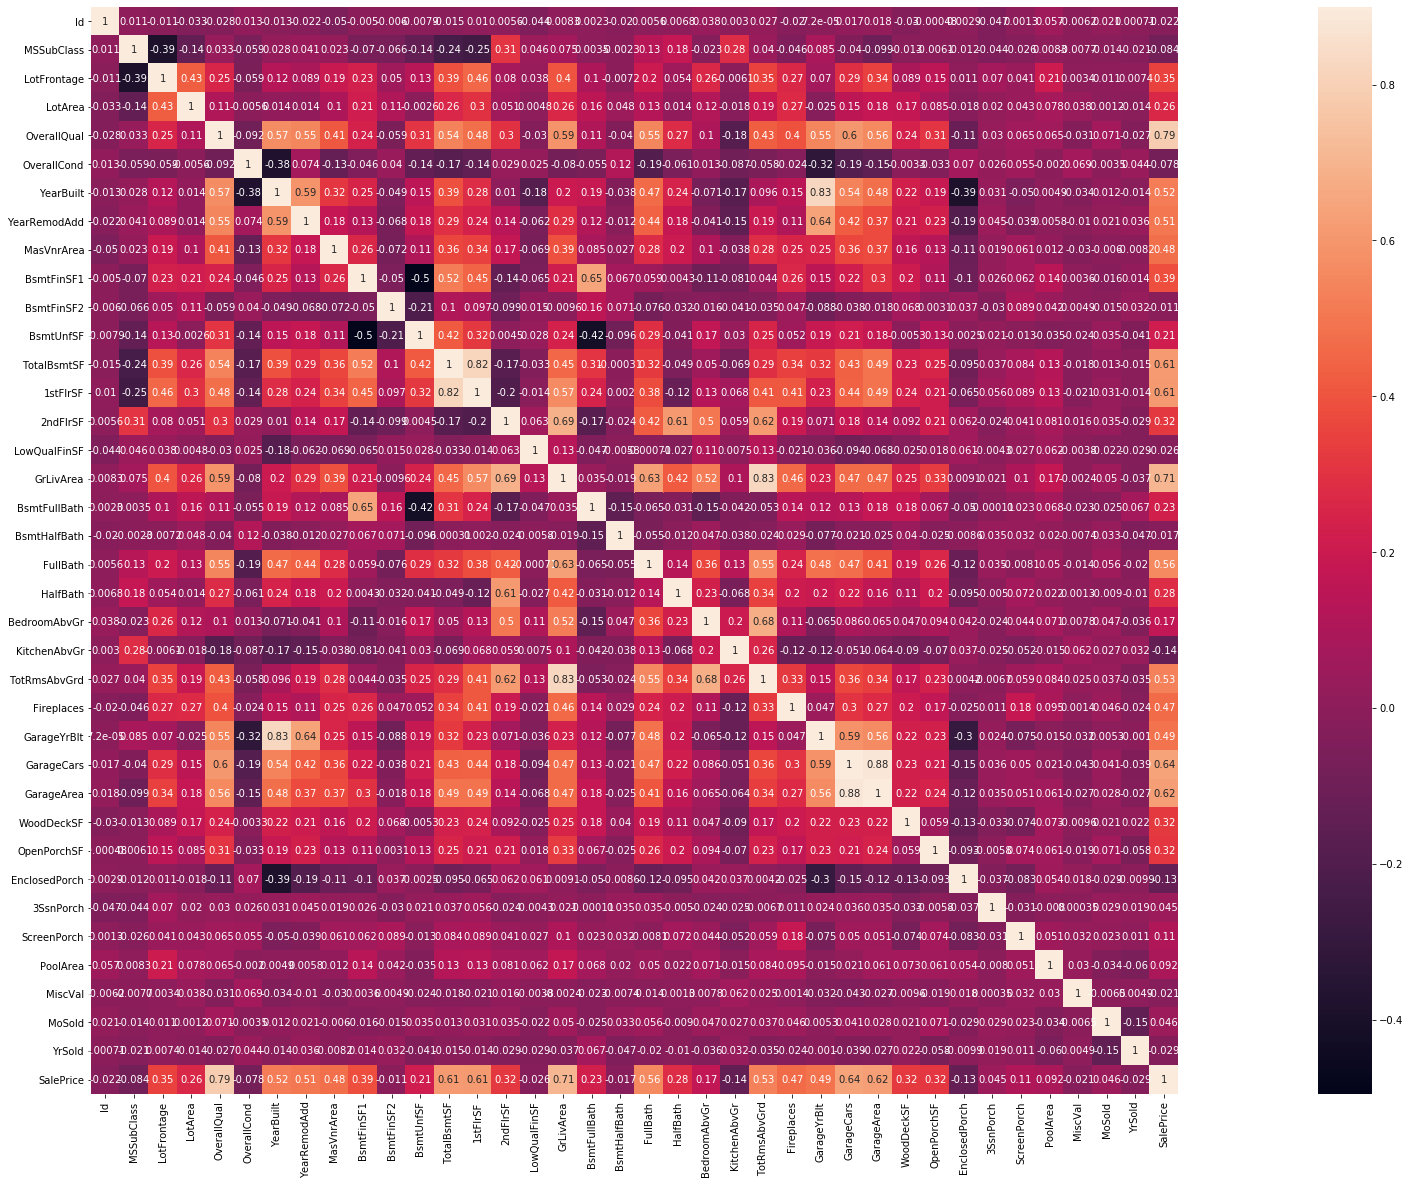

In [9]:
#Check the correlation between features before multivariate outlier analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (50,20))
sns.heatmap(train_c.corr(),vmax=0.9, square=True, annot=True)

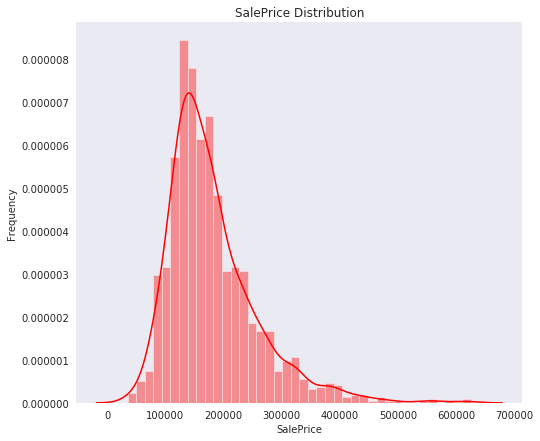

Skewness: 1.567777
Kurtosis: 3.889917


In [57]:
# Before Log Transformation

sns.set_style("dark")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train_c['SalePrice'], color="red");


ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice Distribution")
sns.despine(trim=True, left=True)
plt.show()


# Skewness and Kurtosis
print("Skewness: %f" % train_c['SalePrice'].skew())
print("Kurtosis: %f" % train_c['SalePrice'].kurt())

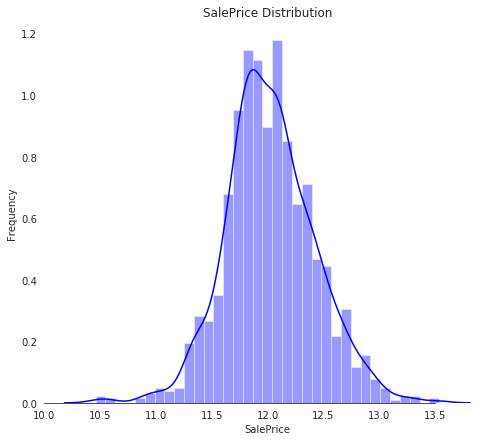

Skewness: 0.121335
Kurtosis: 0.809532


In [11]:
# After Log Transformation

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(np.log(train_c['SalePrice']), color="blue");


ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice Distribution")
sns.despine(trim=True, left=True)
plt.show()


# Skewness and Kurtosis
print("Skewness: %f" % np.log(train_c['SalePrice']).skew())
print("Kurtosis: %f" % np.log(train_c['SalePrice']).kurt())

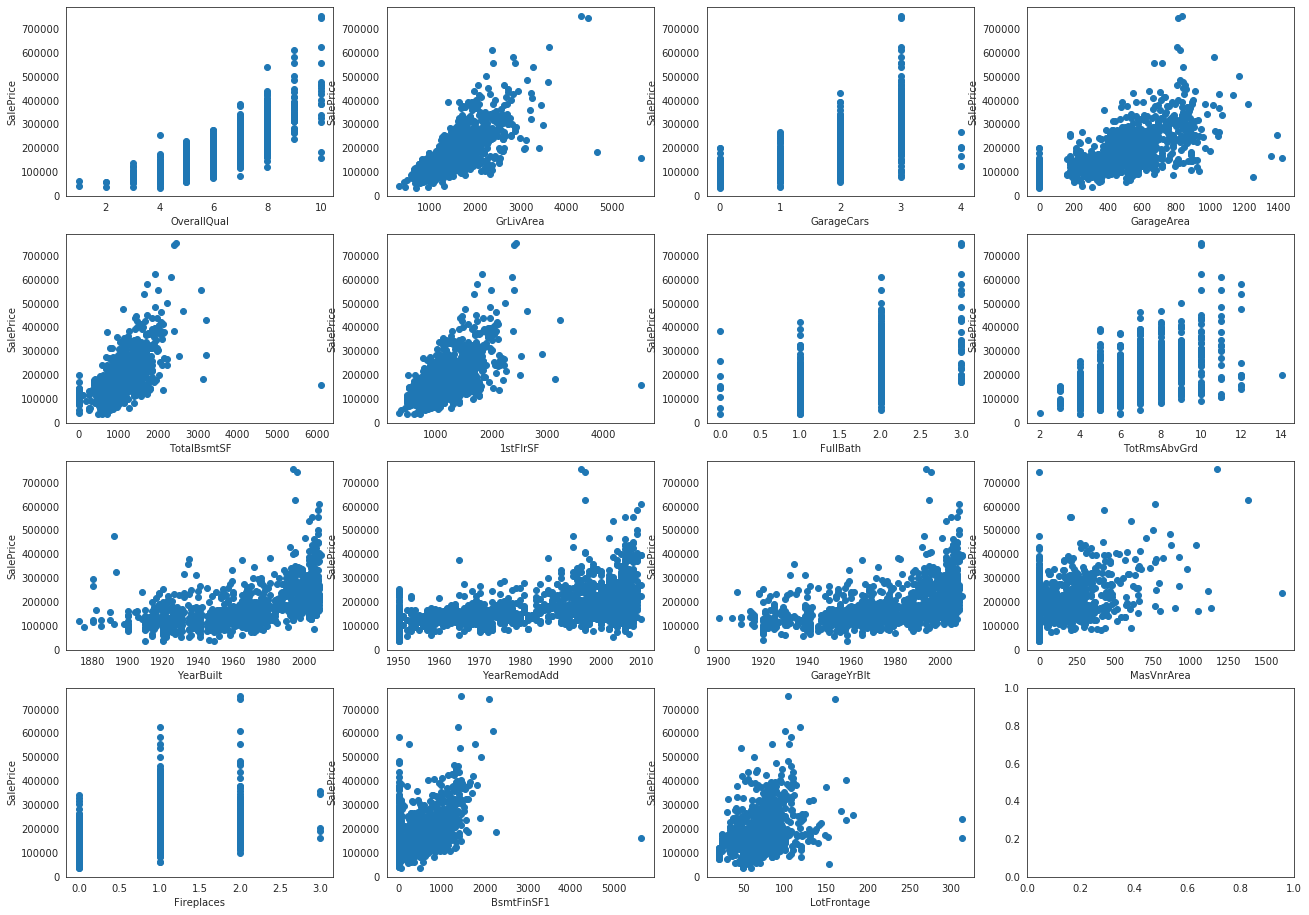

In [12]:
# Most Correlated 16 Features Relationship SalesPrice

n_rows = 4
n_cols = 4

counter=0
fig, axc = plt.subplots(n_rows,n_cols,figsize=(22,16))
for i in range(n_rows):
    for j in range(n_cols):
        if counter>=len(top16_corr_names):
            break
        name=top16_corr_names[counter]
        axc[i][j].scatter(x = train_c[name], y = train_c['SalePrice'])
        axc[i][j].set(xlabel=name, ylabel='SalePrice')

        counter+=1

plt.show()

In [13]:
train_c.shape

(1460, 81)

In [14]:
#  Delete some Outliers that we have observed.
train_c = train_c.drop(train_c[(train_c['GarageCars']>2) & (train_c['SalePrice']>700000)].index)
train_c = train_c.drop(train_c[(train_c['TotalBsmtSF']>5000) & (train_c['SalePrice']<300000)].index)
train_c = train_c.drop(train_c[(train_c['LotFrontage']>250) & (train_c['SalePrice']<500000)].index)
train_c = train_c.drop(train_c[(train_c['GrLivArea']>4000) & (train_c['SalePrice']<300000)].index)

In [15]:
train_c.shape

(1455, 81)

In [16]:
train_c['train']  = 1
test_c['train']  = 0
df = pd.concat([train_c, test_c], axis=0,sort=False)

In [17]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  train  
0       WD         Normal   208500.0      1  
1       WD         Normal   181500.0      1  
2       WD         Normal   223500.0      1  
3       WD        Abnorml   140000.0      1  
4       WD         Normal   250000.0      1  

[5 rows x 82 columns]

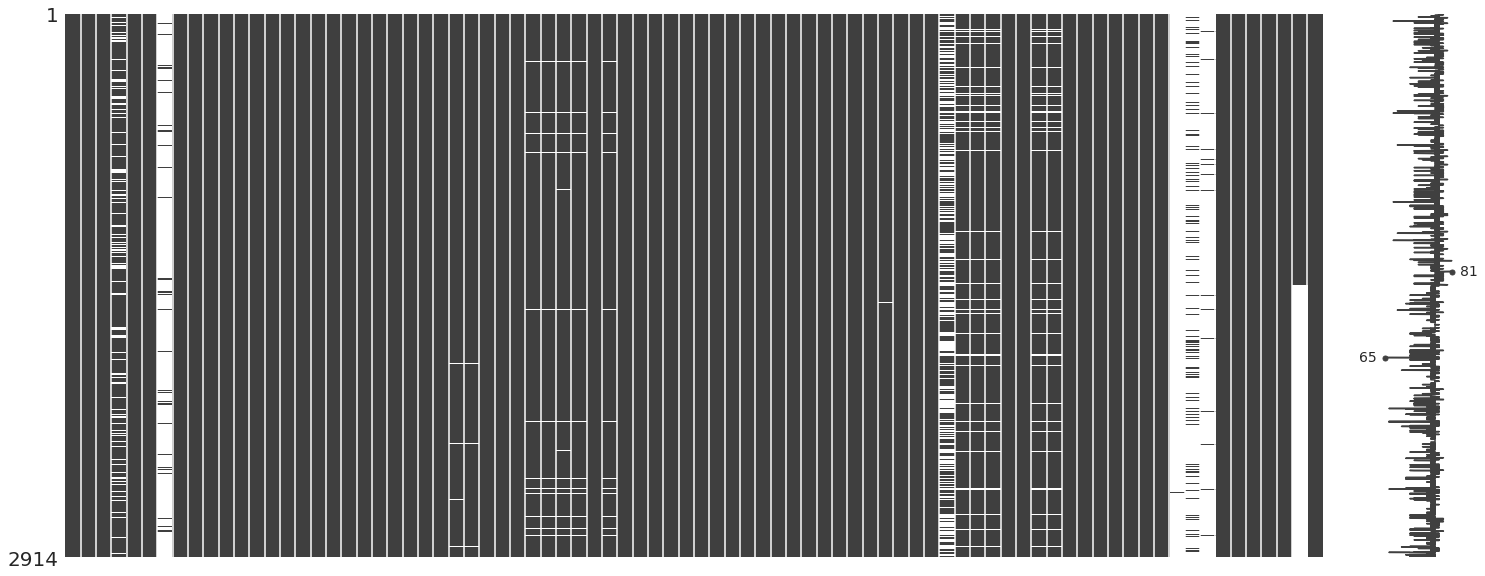

In [18]:
import missingno as msno

msno.matrix(df); # Observation of Missing Value of Train Data

In [19]:
def miss_value_detection(data):
# Find missing values in the data
    features=data.shape[0]
    miss_values=data.isnull().sum()
    
    miss_values=miss_values[miss_values!=0].sort_values(ascending=False)

    if miss_values.shape[0]==0:
        print("There is no missing value in the data")
        print(miss_values)
    else:
        print(miss_values)

In [20]:
miss_value_detection(df)

PoolQC          2906
MiscFeature     2809
Alley           2716
Fence           2344
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF2         1
BsmtUnfSF          1
BsmtFinSF1         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64


In [21]:
#Percentage of NAN Values 
per_Nan = [(c, df[c].isna().mean()*100) for c in df]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])

In [22]:
# Detection of over %50 NaN value Features
per_Nan = per_Nan[per_Nan.Percentage > 50]
per_Nan.sort_values("Percentage", ascending=False)

column_name  Percentage
72       PoolQC   99.725463
74  MiscFeature   96.396706
6         Alley   93.205216
73        Fence   80.439259
80    SalePrice   50.068634

In [23]:
#Drop PoolQC, MiscFeature, Alley and Fence features because there are too many missing value
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2914 non-null   int64  
 1   MSSubClass     2914 non-null   int64  
 2   MSZoning       2910 non-null   object 
 3   LotFrontage    2428 non-null   float64
 4   LotArea        2914 non-null   int64  
 5   Street         2914 non-null   object 
 6   LotShape       2914 non-null   object 
 7   LandContour    2914 non-null   object 
 8   Utilities      2912 non-null   object 
 9   LotConfig      2914 non-null   object 
 10  LandSlope      2914 non-null   object 
 11  Neighborhood   2914 non-null   object 
 12  Condition1     2914 non-null   object 
 13  Condition2     2914 non-null   object 
 14  BldgType       2914 non-null   object 
 15  HouseStyle     2914 non-null   object 
 16  OverallQual    2914 non-null   int64  
 17  OverallCond    2914 non-null   int64  
 18  YearBuil

In [25]:
# Select object and numeric features
object_columns_df = df.select_dtypes(include=['object'])
numerical_columns_df =df.select_dtypes(exclude=['object'])

In [26]:
object_columns_df.shape

(2914, 39)

In [27]:
numerical_columns_df.shape

(2914, 39)

In [28]:
miss_value_detection(numerical_columns_df)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64


In [29]:
miss_value_detection(object_columns_df)

FireplaceQu     1420
GarageQual       159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64


In [30]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns_df[columns_None]= object_columns_df[columns_None].fillna('None')

In [31]:
columns_with_lowNA = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
#fill missing values for each column (using its own most frequent value)
object_columns_df[columns_with_lowNA] = object_columns_df[columns_with_lowNA].fillna(object_columns_df.mode().iloc[0])

In [32]:
miss_value_detection(numerical_columns_df)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
GarageArea         1
GarageCars         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
dtype: int64


In [33]:
print((numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt']).median())
print(numerical_columns_df["LotFrontage"].median())

35.0
68.0


In [34]:
numerical_columns_df['GarageYrBlt'] = numerical_columns_df['GarageYrBlt'].fillna(numerical_columns_df['YrSold']-35)
numerical_columns_df['LotFrontage'] = numerical_columns_df['LotFrontage'].fillna(68)

In [35]:
numerical_columns_df= numerical_columns_df.fillna(0)

AllPub    2913
NoSeWa       1
Name: Utilities, dtype: int64

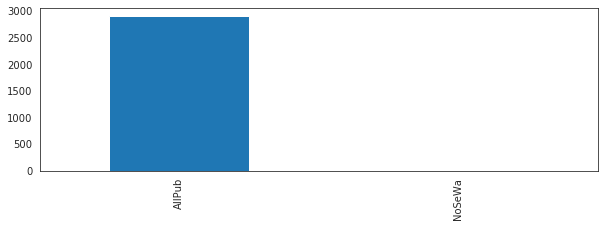

In [36]:
object_columns_df['Utilities'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Utilities'].value_counts() 

Pave    2902
Grvl      12
Name: Street, dtype: int64

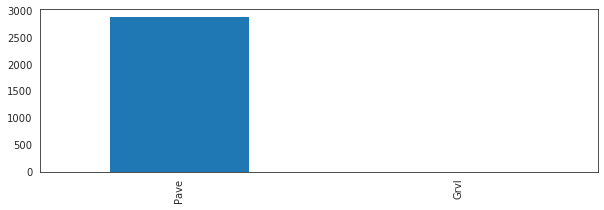

In [37]:
object_columns_df['Street'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Street'].value_counts() 

Norm      2885
Feedr       13
Artery       5
PosA         4
PosN         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

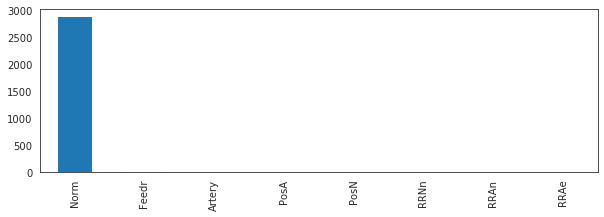

In [38]:
object_columns_df['Condition2'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Condition2'].value_counts() 

CompShg    2874
Tar&Grv      22
WdShake       9
WdShngl       6
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

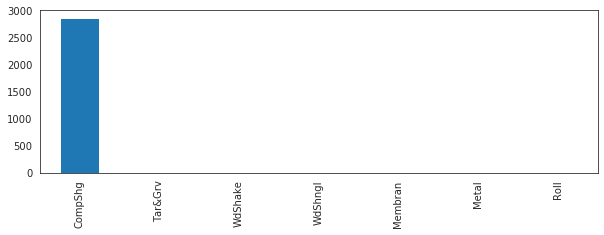

In [39]:
object_columns_df['RoofMatl'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['RoofMatl'].value_counts() 

GasA     2869
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

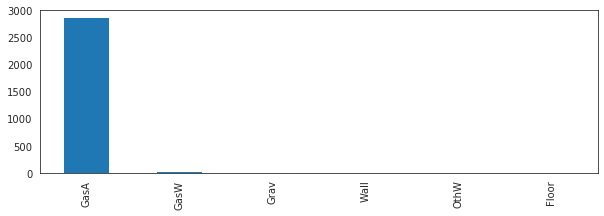

In [40]:
object_columns_df['Heating'].value_counts().plot(kind='bar',figsize=[10,3])
object_columns_df['Heating'].value_counts() #======> Drop feature one Type

In [41]:
object_columns_df = object_columns_df.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

In [42]:
# Manually calculate the Age_House feature using the YrSold and YearBuilt features
# Age_House = YrSold - YearBuilt 
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2914.000000
mean       36.517845
std        30.339591
min        -1.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: Age_House, dtype: float64

In [43]:
# Since the Age_House variable cannot be negative,
# we questioned if there is a negative value and we detected 1 negative value.
Negatif = numerical_columns_df[numerical_columns_df['Age_House'] < 0]
Negatif

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1089  2550          20        128.0    39290           10            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  EnclosedPorch  \
1089       2008          2009      1224.0      4010.0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
1089          0            0         0    17000      10    2007        0.0   

      train  Age_House  
1089      0         -1  

[1 rows x 40 columns]

In [44]:
# The process of correcting the negative output variable. 2009 new YrSold value
numerical_columns_df.loc[numerical_columns_df['YrSold'] < numerical_columns_df['YearBuilt'],'YrSold' ] = 2009
numerical_columns_df['Age_House']= (numerical_columns_df['YrSold']-numerical_columns_df['YearBuilt'])
numerical_columns_df['Age_House'].describe()

count    2914.000000
mean       36.518531
std        30.338764
min         0.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: Age_House, dtype: float64

In [45]:
# TotalBsmtBath = BsmtFullBath + 0.5*BsmtHalfBath

# TotalBath     = FullBath + 0.5*HalfBath

# TotalSA       = TotalBsmtBath + 1stFlrSF + 2ndFlrSF 

numerical_columns_df['TotalBsmtBath'] = numerical_columns_df['BsmtFullBath'] + numerical_columns_df['BsmtFullBath']*0.5
numerical_columns_df['TotalBath'] = numerical_columns_df['FullBath'] + numerical_columns_df['HalfBath']*0.5 
numerical_columns_df['TotalSA']=numerical_columns_df['TotalBsmtSF'] + numerical_columns_df['1stFlrSF'] + numerical_columns_df['2ndFlrSF']

In [46]:
# Now the next step is to encode categorical features
# Ordinal categories features - Mapping from 0 to N

bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }
object_columns_df['ExterQual'] = object_columns_df['ExterQual'].map(bin_map)
object_columns_df['ExterCond'] = object_columns_df['ExterCond'].map(bin_map)
object_columns_df['BsmtCond'] = object_columns_df['BsmtCond'].map(bin_map)
object_columns_df['BsmtQual'] = object_columns_df['BsmtQual'].map(bin_map)
object_columns_df['HeatingQC'] = object_columns_df['HeatingQC'].map(bin_map)
object_columns_df['KitchenQual'] = object_columns_df['KitchenQual'].map(bin_map)
object_columns_df['FireplaceQu'] = object_columns_df['FireplaceQu'].map(bin_map)
object_columns_df['GarageQual'] = object_columns_df['GarageQual'].map(bin_map)
object_columns_df['GarageCond'] = object_columns_df['GarageCond'].map(bin_map)
object_columns_df['CentralAir'] = object_columns_df['CentralAir'].map(bin_map)
object_columns_df['LotShape'] = object_columns_df['LotShape'].map(bin_map)
object_columns_df['BsmtExposure'] = object_columns_df['BsmtExposure'].map(bin_map)
object_columns_df['BsmtFinType1'] = object_columns_df['BsmtFinType1'].map(bin_map)
object_columns_df['BsmtFinType2'] = object_columns_df['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_columns_df['PavedDrive'] = object_columns_df['PavedDrive'].map(PavedDrive)

In [47]:
#Select categorical features
rest_object_columns = object_columns_df.select_dtypes(include=['object'])
#Using One hot encoder
object_columns_df = pd.get_dummies(object_columns_df, columns=rest_object_columns.columns) 

In [48]:
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

LotShape  ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  \
0         3          4          2         4         2             2   
1         3          2          2         4         2             4   
2         2          4          2         4         2             2   
3         2          2          2         2         4             2   
4         2          4          2         4         2             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  CentralAir  ...  PoolArea  MiscVal  \
0             6             1          4           1  ...         0        0   
1             5             1          4           1  ...         0        0   
2             6             1          4           1  ...         0        0   
3             5             1          4           1  ...         0        0   
4             6             1          4           1  ...         0        0   

   MoSold  YrSold  SalePrice  train  Age_House  TotalBsmtBath  TotalBath  \
0       2    2008   208500.0      1          5            1.5        2.5   
1       5    2007   181500.0      1         31            0.0        2.0   
2       9    2008   223500.0      1          7            1.5        2.5   
3       2    2006   140000.0      1         91            1.5        1.0   
4      12    2008   250000.0      1          8            1.5        2.5   

   TotalSA  
0   2566.0  
1   2524.0  
2   2706.0  
3   2473.0  
4   3343.0  

[5 rows x 207 columns]

In [49]:
df_final = df_final.drop(['Id',],axis=1)

df_train = df_final[df_final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


In [50]:
df_test = df_final[df_final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [51]:
target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

In [52]:
# StandardScaler of Most Important Features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_train)


df_train=scaler.transform(df_train)


ModuleNotFoundError: No module named 'sklearn'

In [53]:
df_train[0:3]

array([[ 7.00414058e-01,  1.30289303e+00, -2.94026124e-01,
         9.45439291e-01, -1.10619549e-02, -3.79272675e-01,
         1.16943999e+00, -2.77701838e-01,  6.88706129e-01,
         2.64297070e-01,  1.05336695e+00, -9.28018498e-01,
         2.28713329e-01,  2.42467171e-01,  2.90284055e-01,
        -8.31890331e-02, -2.16246595e-01, -1.05445875e-01,
         5.19262465e-01, -4.19800931e-01, -2.09186441e-01,
        -1.86683261e-01, -1.59279562e-01,  3.33969345e-01,
        -4.66447448e-01, -2.62805751e-01, -1.82703809e-01,
        -5.25044713e-02,  6.21059003e-01,  2.36385457e-01,
        -2.14499568e-01, -9.49487050e-02, -1.08728906e-01,
        -3.71007074e-02, -1.05445875e-01, -2.03758528e-01,
        -1.40077064e-01,  2.94957624e+00, -1.90590625e-01,
        -2.68734308e-01, -2.39609663e-01, -1.61533553e-01,
        -1.08728906e-01, -1.86683261e-01, -4.26574591e-01,
        -7.88927525e-02, -2.29830366e-01, -1.65958949e-01,
        -2.36385457e-01, -2.90176985e-01, -1.32221471e-0

# MODELLİNG

In [54]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)

# XGBO0ST

In [56]:
# The parameters to be sent for the Grid Search CV were created in the form of a dictionary structure.
xgb_grid = {
     'colsample_bytree': [0.4, 0.5], 
     'n_estimators':[1000,2000,2500],
     'max_depth': [3,4],
     'learning_rate': [0.01, 0.05],
    'min_child_weight' :[1.7500],
    'gamma' : [0.045],
    'max_depth' : [3],
    'reg_alpha' : [0.5]
}

In [57]:
xgb = XGBRegressor(booster = 'gbtree') 
# Creating the model object
# booster = 'gbtree' parameter is set as none by default, so we set it manually!

In [58]:
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, # model
                      cv = 5, # To make a 10-fold CV
                      n_jobs = -1,# Number of jobs to be run in parallel (-1: means to use all processors)
                      verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

In [59]:
xgb_cv.fit(X_train, y_train) # model fit process

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_j...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [60]:
# The best parameter obtained as a result of CV process

print("The best parameters: " + str(xgb_cv.best_params_))

The best parameters: {'colsample_bytree': 0.4, 'gamma': 0.045, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1.75, 'n_estimators': 2500, 'reg_alpha': 0.5}


In [61]:
# Setting the Final Model with the best parameter

xgb_cv_tuned = xgb_cv.best_estimator_

# Fitting Final Model
xgb_cv_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.045, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1.75, missing=nan, monotone_constraints='()',
             n_estimators=2500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
# K-fold rmse

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = -cross_val_score(xgb_cv_tuned, X_test, y_test, cv=kf, scoring= "neg_mean_squared_error")

print("K-fold Cross Validation rmse Results: ",np.sqrt(cv_results_kfold))
print("K-fold Cross Validation rmse Results Mean: ",np.sqrt(cv_results_kfold).mean())

K-fold Cross Validation rmse Results:  [20748.82810737 26039.40737669 21119.02627641 22474.95215243
 23126.39730527]
K-fold Cross Validation rmse Results Mean:  22701.722243631808


In [63]:
y_pred = xgb_cv_tuned.predict(X_test) 

In [64]:
# RMSE 
np.sqrt(mean_squared_error(y_test, y_pred)) 


21904.915067866346

In [65]:
# R2 Score
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9178268973073878

# Light GBM

In [66]:
# The parameters to be sent for the Grid Search CV were created in the form of a dictionary structure.
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6],
    'learning_rate': [0.02, 0.2,0.5],
    'n_estimators': [200, 500,1000],
    'max_depth': [7,8],
    'bagging_fraction' : [0.8],
    'feature_fraction' : [0.2,0.25],
    'min_data_in_leaf' : [6],
    'min_sum_hessian_in_leaf' : [11],
    'num_leaves' : [5,10],
    'max_bin' : [55]}

In [67]:
lgbm = LGBMRegressor(objective='regression',feature_fraction_seed=9, bagging_seed=9)

# Creating the model object

In [68]:
lgbm_cv = GridSearchCV(lgbm, 
                      param_grid = lgbm_grid, # model
                      cv = 5, # To make a 10-fold CV
                      n_jobs = -1,# Number of jobs to be run in parallel (-1: means to use all processors)
                      verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

In [69]:
lgbm_cv.fit(X_train, y_train) # model fit process

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  1.6min finished


GridSearchCV(cv=5,
             estimator=LGBMRegressor(bagging_seed=9, feature_fraction_seed=9,
                                     objective='regression'),
             n_jobs=-1,
             param_grid={'bagging_fraction': [0.8],
                         'colsample_bytree': [0.4, 0.5, 0.6],
                         'feature_fraction': [0.2, 0.25],
                         'learning_rate': [0.02, 0.2, 0.5], 'max_bin': [55],
                         'max_depth': [7, 8], 'min_data_in_leaf': [6],
                         'min_sum_hessian_in_leaf': [11],
                         'n_estimators': [200, 500, 1000],
                         'num_leaves': [5, 10]},
             verbose=2)

In [70]:
# The best parameter obtained as a result of CV process

print("The best parameters: " + str(lgbm_cv.best_params_))

The best parameters: {'bagging_fraction': 0.8, 'colsample_bytree': 0.4, 'feature_fraction': 0.25, 'learning_rate': 0.02, 'max_bin': 55, 'max_depth': 8, 'min_data_in_leaf': 6, 'min_sum_hessian_in_leaf': 11, 'n_estimators': 1000, 'num_leaves': 10}


In [71]:
# Setting the Final Model with the best parameter

lgbm_cv_tuned = lgbm_cv.best_estimator_

# Fitting Final Model
lgbm_cv_tuned.fit(X_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_seed=9, colsample_bytree=0.4,
              feature_fraction=0.25, feature_fraction_seed=9,
              learning_rate=0.02, max_bin=55, max_depth=8, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=1000, num_leaves=10,
              objective='regression')

In [72]:
# K-fold rmse

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf2 = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold2 = -cross_val_score(lgbm_cv_tuned, X_test, y_test, cv=kf2, scoring= "neg_mean_squared_error")

print("K-fold Cross Validation rmse Results: ",np.sqrt(cv_results_kfold2))
print("K-fold Cross Validation rmse Results Mean: ",np.sqrt(cv_results_kfold2).mean())

K-fold Cross Validation rmse Results:  [23145.11176267 25254.88369324 23277.80053298 19148.80771885
 21729.97621499]
K-fold Cross Validation rmse Results Mean:  22511.315984546207


In [73]:
y_pred2 = lgbm_cv_tuned.predict(X_test) 

In [74]:
# RMSE 
np.sqrt(mean_squared_error(y_test, y_pred2)) 

21513.07859701844

In [75]:
# R2 Score
from sklearn import metrics
metrics.r2_score(y_test,y_pred2)

0.9207404383835318

In [76]:
y_pred3 = lgbm_cv_tuned.predict(df_test) 

In [77]:
submision = pd.DataFrame()
submision['Id'] = test_c['Id']
submision['SalePrice'] = y_pred3
submision.to_csv('submission_lgbm.csv',index=False)